## Spain National Football team - Julen Lopetegui as Spain Coach

Here we will visualize the impact that Julen Lopetegui has had on Spanish football (soccer) in terms of young talent and it's promotion. 

**Hypothesis:** Julen Lopetegui has a reputation for promoting young talent and we expect to see the same below, by visualizing the average minutes played by the youngsters under him, as well as the chances/goals/assists created by the same crop.

Beautifulsoup package has been used for parsing web pages. [1]

**Note:** Year column is the start of the season. So, Year 2016 is 16-17 season. 

In [157]:
import requests # HTTP requests library
from bs4 import BeautifulSoup # for parsing html pages.
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
# In a notebook environment, display the plots inline
%matplotlib inline
import re

 Setting parameters for matplotlib [3]:

In [207]:
import matplotlib
# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (18, 12))
# Font size to 14
matplotlib.rc('font', size = 14)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = True)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

#matplotlib.rc('font', size=SMALL_SIZE)          # controls default text sizes
matplotlib.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels

# Data Scraping

In [5]:
def get_team_data_per_year(year):
    url = "https://www.transfermarkt.co.uk/spain/leistungsdaten/verein/3375/plus/0?reldata=%26{}".format(year)
    pageTree = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    pageSoup = BeautifulSoup(pageTree.content, 'html5lib')
    players = pageSoup.find_all("span", {"class": "hide-for-small"})
    minutes_played = pageSoup.find_all("td", {"class": "rechts "})
    tableItems = pageSoup.find_all("td", {"class": "zentriert"})
    ages = tableItems[1::6]
    players_list = []
    ages_list = []
    minutes_played_list = []
    i = 1
    j = 0
    try:
        while True:
            players_list.append(players[i].a.text)
            ages_list.append(ages[j].text)
            minutes_played_list.append(minutes_played[j].text)
            i += 1
            j += 1
    except:
        print("Page Parsed - {}".format(year))    

    df = pd.DataFrame({"Player":players_list, 
                       "Debut Age":ages_list, 
                       "{}".format(year):minutes_played_list}, 
                      columns=("Player","Debut Age","{}".format(year)))
    df.set_index("Player", inplace=True)
    return df

In [6]:
def get_all_data_given_range(func, year_start, year_end):
    df = func(year_start)
    for year in range(year_start+1, year_end+1):
        df = pd.merge(df, func(year), left_index=True, right_index=True, how='outer', on='Age')
    return df

In [37]:
all_data = get_all_data_given_range(get_team_data_per_year, 1920, 2017)

Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.
Page Parsed.

In [198]:
# Considering only the players who have played a single minute of the game.
def get_average_minutes_played_under_age(player_age, year):
    url = "https://www.transfermarkt.co.uk/spain/leistungsdaten/verein/3375/plus/0?reldata=%26{}".format(year)
    pageTree = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    pageSoup = BeautifulSoup(pageTree.content, 'html5lib')
    players = pageSoup.find_all("span", {"class": "hide-for-small"})
    minutes_played = pageSoup.find_all("td", {"class": "rechts "})
    tableItems = pageSoup.find_all("td", {"class": "zentriert"})
    ages = tableItems[1::6]
    players_list = []
    ages_list = []
    minutes_played_list = []
    i = 1
    j = 0
    try:
        while True:
            players_list.append(players[i].a.text)
            try:
                ages_list.append(int(ages[j].text))
            except:
                ages_list.append(int(re.sub("\D", "", ages[j].text)))
            if minutes_played[j].text != '-':
                minutes_played_list.append(int(minutes_played[j].text[:-1].replace(".","")))
            else:
                minutes_played_list.append(0)
            #minutes_played_list.append(int(minutes_played[j].text.replace("'","")))
            i += 1
            j += 1
    except:
        print("Page Parsed - {}".format(year)) 
    #print(ages_list)
    #print(minutes_played_list)
    
    total_mins = 0
    total_players = 0    
    for i, player in enumerate(players_list):
        '''
        # Not counting players who did not play a single minute.
        if minutes_played_list[i] > 0 and ages_list[i] < player_age:
            #print(player, ages_list[i], minutes_played_list[i])
            total_mins += minutes_played_list[i]
            total_players += 1
        '''
        # Counting all players in the squad- under given age.
        if ages_list[i] < player_age:
            #print(player, ages_list[i], minutes_played_list[i])
            total_mins += minutes_played_list[i]
            total_players += 1
    try: 
        return total_mins/total_players 
    except: 
        return 0

In [199]:
years = []
avgs = []
for year in range(1920,2018):
    years.append(year)
    avgs.append(get_average_minutes_played_under_age(25, year))

Page Parsed - 1920
Page Parsed - 1921
Page Parsed - 1922
Page Parsed - 1923
Page Parsed - 1924
Page Parsed - 1925
Page Parsed - 1926
Page Parsed - 1927
Page Parsed - 1928
Page Parsed - 1929
Page Parsed - 1930
Page Parsed - 1931
Page Parsed - 1932
Page Parsed - 1933
Page Parsed - 1934
Page Parsed - 1935
Page Parsed - 1936
Page Parsed - 1937
Page Parsed - 1938
Page Parsed - 1939
Page Parsed - 1940
Page Parsed - 1941
Page Parsed - 1942
Page Parsed - 1943
Page Parsed - 1944
Page Parsed - 1945
Page Parsed - 1946
Page Parsed - 1947
Page Parsed - 1948
Page Parsed - 1949
Page Parsed - 1950
Page Parsed - 1951
Page Parsed - 1952
Page Parsed - 1953
Page Parsed - 1954
Page Parsed - 1955
Page Parsed - 1956
Page Parsed - 1957
Page Parsed - 1958
Page Parsed - 1959
Page Parsed - 1960
Page Parsed - 1961
Page Parsed - 1962
Page Parsed - 1963
Page Parsed - 1964
Page Parsed - 1965
Page Parsed - 1966
Page Parsed - 1967
Page Parsed - 1968
Page Parsed - 1969
Page Parsed - 1970
Page Parsed - 1971
Page Parsed 

In [120]:
?plt.figtext

In [208]:
def lineplot(x, y, xlabel, ylabel, title):
    _, ax = plt.subplots()
    ax.plot(x, y, lw = 1.5, color = 'blue', alpha = 1)
    ax.set_title(title, fontsize = 16)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    plt.figtext(0.1,0.02,"Data from transfermarkt.com", fontsize = 10)
    plt.figtext(0.83,0.02, "@bringyourdata", fontsize = 10)
    return plt

## Visualizing minutes (on an average) by Spanish under 25 players, over the years.

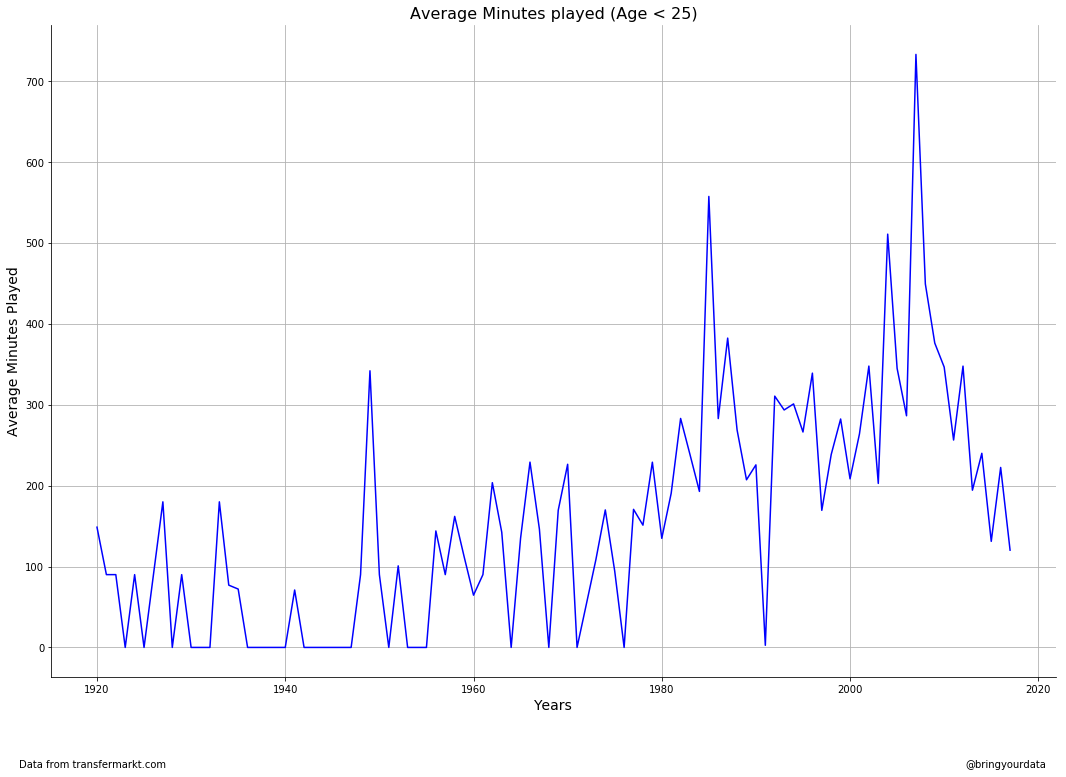

In [209]:
img = lineplot(years, avgs, "Years", "Average Minutes Played", "Average Minutes played (Age < 25)")
img.savefig("all_years_avg_mins_25.png")

## Focusing only on the team which played in the last 20 years.

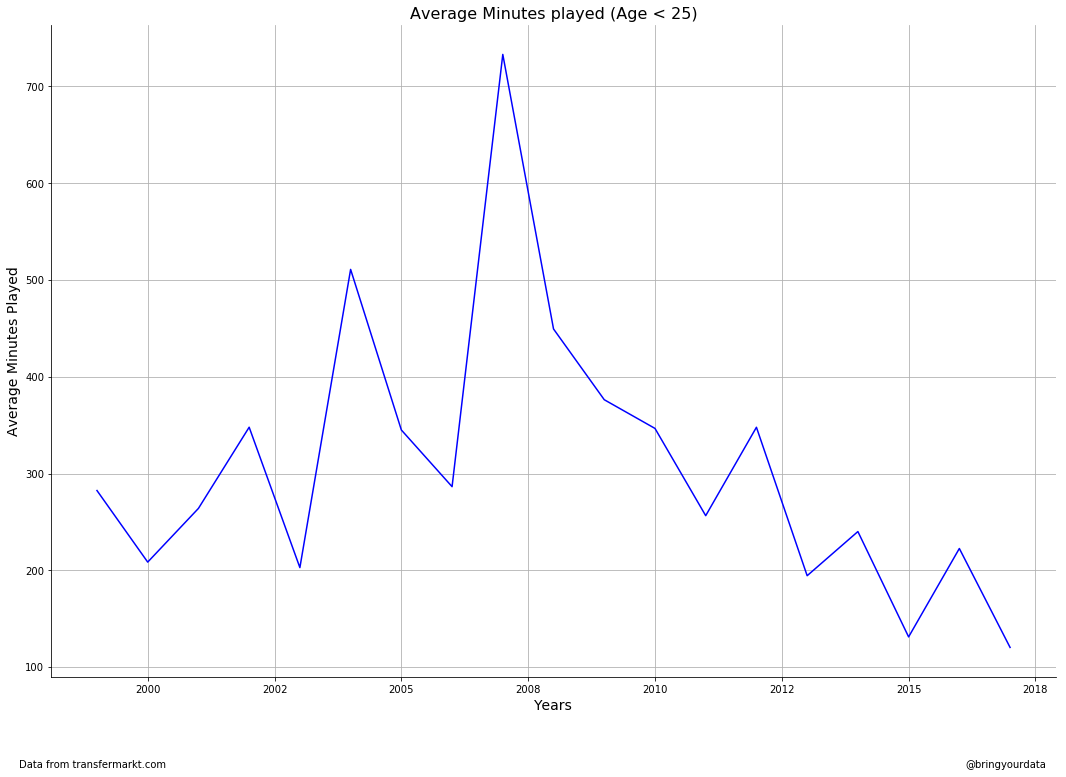

In [210]:
img = lineplot(years[-19:], avgs[-19:], "Years", "Average Minutes Played", "Average Minutes played (Age < 25)")
img.savefig("last_20_years_avg_mins_25.png")

## Visualizing chances/goals (on an average) by Spanish under 25 players, over the years

References:
1. https://fcpython.com/blog/introduction-scraping-data-transfermarkt
2. https://www.digitalocean.com/community/tutorials/how-to-scrape-web-pages-with-beautiful-soup-and-python-3
3. https://www.datascience.com/blog/learn-data-science-intro-to-data-visualization-in-matplotlib